# Chap3_数据预处理和特征工程

## 1.概述

### 1.1 数据预处理和特征工程

**数据挖掘的五大流程**

1. 获取数据
2. **数据预处理** 
   
    数据预处理是从数据中检测，纠正或删除损坏，不准确或不适用于模型的记录的过程可能面对的问题有：数据类型不同，比如有的是文字，有的是数字，有的含时间序列，有的连续，有的间断。也可能，数据的质量不行，有噪声，有异常，有缺失，数据出错，量纲不一，有重复，数据是偏态，数据量太大或太小
    
    数据预处理的目的：让数据适应模型，匹配模型的需求
3. **特征工程**：
   
    特征工程是将原始数据转换为更能代表预测模型的潜在问题的特征的过程，可以通过**挑选最相关的特征，提取特征以及创造特征来实现**。其中创造特征又经常以降维算法的方式实现可能面对的问题有：特征之间有相关性，特征和标签无关，特征太多或太小，或者干脆就无法表现出应有的数据现象或无法展示数据的真实面貌
    
    特征工程的目的：1) 降低计算成本，2) 提升模型上限
4. 建模，测试模型并预测出结果
5. 上线，验证模型效果

### 1.2 sklearn中的数据预处理和特征工程

- 模块preprocessing：几乎包含数据预处理的所有内容
- 模块Impute：填补缺失值专用
- 模块feature_selection：包含特征选择的各种方法的实践
- 模块decomposition：包含降维算法

## 2 数据预处理 Preprocessing & Impute

### 2.1 数据无量纲化

数据的无量纲化可以是线性的，也可以是非线性的。线性的无量纲化包括中心化（Zero-centered或者Meansubtraction）处理和缩放处理（Scale）。中心化的本质是让所有记录减去一个固定值，即让数据样本数据平移到某个位置。缩放的本质是通过除以一个固定值，将数据固定在某个范围之中，取对数也算是一种缩放处理



- preprocessing.MinMaxScaler
  
当数据(x)按照最小值中心化后，再按极差（最大值 - 最小值）缩放，数据移动了最小值个单位，并且会被收敛到
[0,1]之间，而这个过程，就叫做数据归一化(Normalization，又称Min-Max Scaling)

在sklearn当中，我们使用preprocessing.MinMaxScaler来实现这个功能。MinMaxScaler有一个重要参数，
feature_range，控制我们希望把数据压缩到的范围，默认是[0,1]

In [24]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

import pandas as pd
pd.DataFrame(data)

,0,1
0,-1.0,2
1,-0.5,6
2,0.0,10
3,1.0,18


In [25]:
#————————————实现归一化————————————
scaler = MinMaxScaler()   # 实例化

scaler = scaler.fit(data)
result = scaler.transform(data)   # 通过接口导出结果
result

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [26]:
# 也可以直接一步导出
result_ = scaler.fit_transform(data)
result_

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [27]:
#——————————————将归一化的结果逆转——————————————
scaler.inverse_transform(result)

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [28]:
# 使用MinMaxsScaler的参数feature_range实现将数据归一化到[0,1]以外的范围
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler(feature_range=[5,10]) #依然实例化
result = scaler.fit_transform(data) #fit_transform一步导出结果
result

#当X中的特征数量非常多的时候，fit会报错并表示，数据量太大了我计算不了
#此时使用partial_fit作为训练接口
#scaler = scaler.partial_fit(data)

array([[ 5.  ,  5.  ],
       [ 6.25,  6.25],
       [ 7.5 ,  7.5 ],
       [10.  , 10.  ]])

**BONUS: 使用numpy来实现归一化**

${x - max{x} }/ {max{x} - min{x}} $

In [29]:
import numpy as np
X = np.array([[-1, 2], [-0.5, 6], [0, 10], [1, 18]])


In [30]:
#归一化 axis= 0 每一列的最小值 最大值
X_nor = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_nor
#逆转归一化
X_returned = X_nor * (X.max(axis=0) - X.min(axis=0)) + X.min(axis=0)
X_returned

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

- preprocessing.StandardScaler

当数据(x)按均值(μ)中心化后，再按标准差(σ)缩放，数据就会服从为均值为0，方差为1的正态分布（即标准正态分
布），而这个过程，就叫做数据标准化(Standardization，又称Z-score normalization)，公式如下：


$$x^{*} = \frac{x - \mu}{\sigma}$$

In [31]:
from sklearn.preprocessing import StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]


In [32]:
scaler = StandardScaler() #实例化
scaler.fit(data) #fit，本质是生成均值和方差


StandardScaler()

In [33]:
# sklearn 自动按列压缩
scaler.mean_ #查看均值的属性mean_
scaler.var_ #查看方差的属性var_


array([ 0.546875, 35.      ])

In [34]:

x_std = scaler.transform(data) #通过接口导出结果


In [35]:
x_std.mean() #导出的结果是一个数组，用mean()查看均值


0.0

In [36]:
x_std.std() #用std()查看方差


1.0

In [37]:
scaler.fit_transform(data) #使用fit_transform(data)一步达成结果


array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

In [38]:
scaler.inverse_transform(x_std) #使用inverse_transform逆转标准化

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

- StandardScaler和MinMaxScaler选哪个？

看情况。大多数机器学习算法中，会选择StandardScaler来进行特征缩放，因为MinMaxScaler对异常值非常敏感。在PCA，聚类，逻辑回归，支持向量机，神经网络这些算法中，StandardScaler往往是最好的选择。

MinMaxScaler在不涉及距离度量、梯度、协方差计算以及数据需要被压缩到特定区间时使用广泛，比如数字图像处理中量化像素强度时，都会使用MinMaxScaler将数据压缩于[0,1]区间之中。

建议先试试看StandardScaler，效果不好换MinMaxScaler。

除了StandardScaler和MinMaxScaler之外，sklearn中也提供了各种其他缩放处理（中心化只需要一个pandas广播一下减去某个数就好了，因此sklearn不提供任何中心化功能）。比如，在希望压缩数据，却不影响数据的稀疏性时（不影响矩阵中取值为0的个数时），我们会使用MaxAbsScaler；在异常值多，噪声非常大时，我们可能会选用分位数来无量纲化，此时使用RobustScaler。

### 2.2 缺失值

- SimpleImputer()
  - strategy='median'
- fit_transform一步完成调取结果
- 
- fillna
- dropna

In [39]:
import pandas as pd
data = pd.read_csv('./DATASETS/chap3/Narrativedata.csv',index_col=0)
# index_col= 0 第一列为索引
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


- impute.SimpleImputer
  
class sklearn.impute.SimpleImputer (missing_values=nan, strategy=’mean’, fill_value=None, verbose=0,
copy=True)

在讲解随机森林的案例时，我们用这个类和随机森林回归填补了缺失值，对比了不同的缺失值填补方式对数据的影
响。这个类是专门用来填补缺失值的。它包括四个重要参数：

参数             |   含义&输入

missing_values  |告诉SimpleImputer，数据中的缺失值长什么样，默认空值np.nan
strategy
我们填补缺失值的策略，默认均值。
输入“mean”使用均值填补（仅对数值型特征可用）
输入“median"用中值填补（仅对数值型特征可用）
输入"most_frequent”用众数填补（对数值型和字符型特征都可用）
输入“constant"表示请参考参数“fill_value"中的值（对数值型和字符型特征都可用）
fill_value 当参数startegy为”constant"的时候可用，可输入字符串或数字表示要填充的值，常用0
copy 默认为True，将创建特征矩阵的副本，反之则会将缺失值填补到原本的特征矩阵中去。

In [41]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [42]:
data.loc[:,'Age'].values.reshape(-1,1)   # 把serise对象升维到二维

array([[22.  ],
       [38.  ],
       [26.  ],
       [35.  ],
       [35.  ],
       [  nan],
       [54.  ],
       [ 2.  ],
       [27.  ],
       [14.  ],
       [ 4.  ],
       [58.  ],
       [20.  ],
       [39.  ],
       [14.  ],
       [55.  ],
       [ 2.  ],
       [  nan],
       [31.  ],
       [  nan],
       [35.  ],
       [34.  ],
       [15.  ],
       [28.  ],
       [ 8.  ],
       [38.  ],
       [  nan],
       [19.  ],
       [  nan],
       [  nan],
       [40.  ],
       [  nan],
       [  nan],
       [66.  ],
       [28.  ],
       [42.  ],
       [  nan],
       [21.  ],
       [18.  ],
       [14.  ],
       [40.  ],
       [27.  ],
       [  nan],
       [ 3.  ],
       [19.  ],
       [  nan],
       [  nan],
       [  nan],
       [  nan],
       [18.  ],
       [ 7.  ],
       [21.  ],
       [49.  ],
       [29.  ],
       [65.  ],
       [  nan],
       [21.  ],
       [28.5 ],
       [ 5.  ],
       [11.  ],
       [22.  ],
       [38.  ],
       [

In [43]:

from sklearn.impute import SimpleImputer

#——————————实例化——————————
imp_mean = SimpleImputer()  #默认均值添补
imp_median = SimpleImputer(strategy='median') # 用中位数添补
imp_0 = SimpleImputer(strategy='constant',fill_value=0)  # 用0添补

In [45]:

imp_mean = imp_mean.fit_transform(Age) #fit_transform一步完成调取结果
imp_median = imp_median.fit_transform(Age)
imp_0 = imp_0.fit_transform(Age)


NameError: name 'Age' is not defined

In [46]:
imp_mean[:20]
imp_median[:20]
imp_0[:20]


TypeError: 'SimpleImputer' object is not subscriptable

In [ ]:
#在这里我们使用中位数填补Age
data.loc[:,"Age"] = imp_median
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [ ]:
#————————————使用众数填补Embarked————————————
Embarked = data.loc[:,"Embarked"].values.reshape(-1,1)

In [ ]:
imp_mode = SimpleImputer(strategy = "most_frequent")
data.loc[:,"Embarked"] = imp_mode.fit_transform(Embarked)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  891 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


**BONUS：用Pandas和Numpy进行填补其实更加简单**

In [ ]:
import pandas as pd
data1 = pd.read_csv('./DATASETS/chap3/Narrativedata.csv',index_col=0)
data1.head()


,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [ ]:
#——————————.fillna 在DataFrame里利用中位数进行填补——————————
data1.loc[:,"Age"] = data1.loc[:,"Age"].fillna(data1.loc[:,"Age"].median())
data1.loc[:,'Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

In [ ]:
#————————————dropna——————————————
data1.dropna(axis=0,inplace=True)

#.dropna(axis=0)删除所有有缺失值的行，.dropna(axis=1)删除所有有缺失值的列
#参数inplace，为True表示在原数据集上进行修改，为False表示生成一个复制对象，不修改原数据，默认False

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       889 non-null    float64
 1   Sex       889 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  889 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.7+ KB


### 2.3处理分类型特征：编码与哑变量

在机器学习中，大多数算法，譬如逻辑回归，支持向量机SVM，k近邻算法等都只能够处理数值型数据，不能处理文字，在sklearn当中，除了专用来处理文字的算法，其他算法在fit的时候全部要求输入数组或矩阵，也不能够导入文字型数据（其实手写决策树和普斯贝叶斯可以处理文字，但是**sklearn中规定必须导入数值型**）。

然而在现实中，许多标签和特征在数据收集完毕的时候，都不是以数字来表现的。比如说，学历的取值可以是["小学"，“初中”，“高中”，"大学"]，付费方式可能包含["支付宝"，“现金”，“微信”]等等。在这种情况下，为了让数据适应算法和库，我们必须将数据进行编码，即是说，**将文字型数据转换为数值型**。

- **LabelEncoder：标签专用，能够将分类转换为分类数值**
    - clases_  查看有多少个标签

In [ ]:
from sklearn.preprocessing import LabelEncoder
y = data.iloc[:,-1] # 要输入的是标签，不是特征矩阵，所以允许一维 如果是特征的话必须是二维的


In [ ]:
le = LabelEncoder() #实例化
le = le.fit(y) #导入数据
label = le.transform(y) #transform接口调取结果
label


array([0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1,
       0, 0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2,

In [ ]:
le.classes_ #属性.classes_查看标签中究竟有多少类别

array(['No', 'Unknown', 'Yes'], dtype=object)

In [ ]:
le.fit_transform(y) #也可以直接fit_transform一步到位


array([0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1,
       0, 0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2,

In [ ]:
le.inverse_transform(label) # 使用inverse_transform可以逆转

array(['No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'Unknown', 'Yes', 'No', 'No', 'No', 'Unknown', 'No', 'Yes', 'No',
       'Yes', 'Unknown', 'Yes', 'Yes', 'Yes', 'No', 'Unknown', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Unknown', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Unknown', 'No',
       'Unknown', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Unknown', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'Unknown', 'No', 'No', 'Yes', 'No', 'N

In [ ]:
#如果不需要教学展示的话我会这么写：
from sklearn.preprocessing import LabelEncoder
data.iloc[:,-1] = LabelEncoder().fit_transform(data.iloc[:,-1])

data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


- **OrdinalEncoder：特征专用，能够将分类特征转换为分类数值 )**
  - 不能导入一维数组

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

data_ = data1.copy()
data_.head()


,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [ ]:
# 接口categories_对应LabelEncoder的接口classes_，一模一样的功能

OrdinalEncoder().fit(data_.iloc[:,1:-1]).categories_



[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [ ]:
data_.iloc[:,1:-1] = OrdinalEncoder().fit_transform(data_.iloc[:,1:-1])
data_.head()

,Age,Sex,Embarked,Survived
0,22.0,1.0,2.0,No
1,38.0,0.0,0.0,Yes
2,26.0,0.0,2.0,Yes
3,35.0,0.0,2.0,Yes
4,35.0,1.0,2.0,No


- **OneHotEncoder：独热编码，创建哑变量**
  
我们刚才已经用OrdinalEncoder把分类变量Sex和Embarked都转换成数字对应的类别了。在舱门Embarked这一
列中，我们使用[0,1,2]代表了三个不同的舱门，然而这种转换是正确的吗？
我们来思考三种不同性质的分类数据：

1. 舱门（S，C，Q）

    三种取值S，C，Q是相互独立的，彼此之间完全没有联系，表达的是S≠C≠Q的概念。这是**名义变量**。

2. 学历（小学，初中，高中）

    三种取值不是完全独立的，我们可以明显看出，在性质上可以有高中>初中>小学这样的联系，学历有高低，但是学
历取值之间却不是可以计算的，我们不能说小学 + 某个取值 = 初中。这是**有序变量**。

3. 体重（>45kg，>90kg，>135kg）

    各个取值之间有联系，且是可以互相计算的，比如120kg - 45kg = 90kg，分类之间可以通过数学计算互相转换。这
是**有距变量**。

然而在对特征进行编码的时候，这三种分类数据都会被我们转换为[0,1,2]，这三个数字在算法看来，是连续且可以
计算的，这三个数字相互不等，有大小，并且有着可以相加相乘的联系。所以算法会把舱门，学历这样的分类特
征，都误会成是体重这样的分类特征。这是说，我们把分类转换成数字的时候，忽略了数字中自带的数学性质，所
以给算法传达了一些不准确的信息，而这会影响我们的建模。

类别OrdinalEncoder可以用来处理有序变量，但对于名义变量，我们只有使用哑变量的方式来处理，才能够尽量
向算法传达最准确的信息：

$$ S:0 ---> [1,0,0] ;
 Q:1 ---> [0,1,0] ;
 C:2 ---> [0,0,1] $$

这样的变化，让算法能够彻底领悟，原来三个取值是没有可计算性质的，是“有你就没有我”的不等概念。在我们的
数据中，性别和舱门，都是这样的名义变量。因此我们需要使用独热编码，将两个特征都转换为哑变量

- get_feature_names() 返回稀疏矩阵中列的名字

In [ ]:
data.head()


,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
X = data.iloc[:,1:-1]    # 对中间 2列 性别（男女） 和舱门(三类) 进行转换


In [ ]:

enc = OneHotEncoder(categories='auto').fit(X)
result = enc.transform(X).toarray()   # 编程数组
result


array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [ ]:
#依然可以直接一步到位，但为了给大家展示模型属性，所以还是写成了三步
OneHotEncoder(categories='auto').fit_transform(X).toarray()


array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [ ]:
#依然可以还原
pd.DataFrame(enc.inverse_transform(result))


,0,1
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [ ]:
# 返回每个哑变量的名字
enc.get_feature_names()


array(['x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S'], dtype=object)

In [ ]:
result


array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [ ]:

result.shape


(891, 5)

In [ ]:
#axis=1,表示跨行进行合并，也就是将量表左右相连，如果是axis=0，就是将量表上下相连
newdata = pd.concat([data,pd.DataFrame(result)],axis=1)  
newdata.head()


,Age,Sex,Embarked,Survived,0,1,2,3,4
0,22.0,male,S,0,0.0,1.0,0.0,0.0,1.0
1,38.0,female,C,2,1.0,0.0,1.0,0.0,0.0
2,26.0,female,S,2,1.0,0.0,0.0,0.0,1.0
3,35.0,female,S,2,1.0,0.0,0.0,0.0,1.0
4,35.0,male,S,0,0.0,1.0,0.0,0.0,1.0


In [ ]:
#————————————————删除原来的列——————————————
newdata.drop(["Sex","Embarked"],axis=1,inplace=True)
newdata.columns =["Age","Survived","Female","Male","Embarked_C","Embarked_Q","Embarked_S"]
newdata.head()

,Age,Survived,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,0,0.0,1.0,0.0,0.0,1.0
1,38.0,2,1.0,0.0,1.0,0.0,0.0
2,26.0,2,1.0,0.0,0.0,0.0,1.0
3,35.0,2,1.0,0.0,0.0,0.0,1.0
4,35.0,0,0.0,1.0,0.0,0.0,1.0


### 2.4 处理连续型特征：二值化与分段


- **sklearn.preprocessing.Binarizer**
 
    根据阈值将数据二值化（将特征值设置为0或1），用于处理连续型变量。大于阈值的值映射为1，而小于或等于阈值的值映射为0。默认阈值为0时，特征中所有的正值都映射到1。二值化是对文本计数数据的常见操作，分析人员可以决定仅考虑某种现象的存在与否。它还可以用作考虑布尔随机变量的估计器的预处理步骤（例如，使用贝叶斯设置中的伯努利分布建模）。

In [ ]:
#将年龄二值化
data_2 = data.copy()


In [ ]:
from sklearn.preprocessing import Binarizer


In [ ]:
X = data_2.iloc[:,0].values.reshape(-1,1) # 类为特征专用，所以不能使用一维数组


In [ ]:
transformer = Binarizer(threshold=30).fit_transform(X)
transformer

# threshold 阈值为30

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],

- **KBinsDiscretizer**
  
这是将连续型变量划分为分类变量的类，能够将连续型变量排序后按顺序分箱后编码。总共包含三个重要参数：
  - n_bins： 每个特征中分箱的个数，默认5，一次会被运用到所有导入的特征
  - encode：编码的方式，默认“onehot”
    - "onehot"：做哑变量，之后返回一个稀疏矩阵，每一列是一个特征中的一个类别，含有该类别的样本表示为1，不含的表示为0
    - “ordinal”：每个特征的每个箱都被编码为一个整数，返回每一列是一个特征，每个特征下含有不同整数编码的箱的矩阵
    - "onehot-dense"：做哑变量，之后返回一个密集数组。
  - strategy：用来定义箱宽的方式，默认"quantile"
    - "uniform"：表示等宽分箱，即每个特征中的每个箱的最大值之间的差为(特征.max() - 特征.min())/(n_bins)
    - "quantile"：表示等位分箱，即每个特征中的每个箱内的样本数量都相同
    - "kmeans"：表示按聚类分箱，每个箱中的值到最近的一维k均值聚类的簇心得距离都相同

## 3.特征选择 feature_selection

过滤法，嵌入法，包装法，和降维算法

In [ ]:
# 导入数据
import pandas as pd
data = pd.read_csv('./DATASETS/chap3/digit recognizor.csv')
data.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = data.iloc[:,1:]
y = data.iloc[:,0]
X.shape
# 维度特别高 ---> 特征数据

(42000, 784)

### 3.1 Filter过滤法

过滤方法通常用作预处理步骤，特征选择完全独立于任何机器学习算法。它是根据各种统计检验中的分数以及相关
性的各项指标来选择特征

$$全部特征 ->  最佳特征子集 -> 算法 -> 模型评估$$

#### 3.1.1 方差过滤
##### 3.1.1.1 VarianceThreshold

这是通过特征本身的方差来筛选特征的类。

比如一个特征本身的方差很小，就表示样本在这个特征上基本没有差
异，可能特征中的大多数值都一样，甚至整个特征的取值都相同，那这个特征对于样本区分没有什么作用。所以无
论接下来的特征工程要做什么，都要优先消除方差为0的特征。

VarianceThreshold有重要参数threshold，表示方差的阈值，表示舍弃所有方差小于threshold的特征，不填默认为0，即删除所有的记录都相同的特征。

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
#——————————实例化——————————
selector = VarianceThreshold() # 不填参数默认方差为0

In [ ]:
X_var0 = selector.fit_transform(X)   # 获取删除不合格特征之后的新矩阵

In [ ]:
X_var0.shape

(42000, 708)

In [ ]:
pd.DataFrame(X_var0).head()

,0,1,2,3,4,5,6,7,8,9,...,698,699,700,701,702,703,704,705,706,707
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


可以看见，我们已经删除了方差为0的特征，但是依然剩下了708多个特征，明显还需要进一步的特征选择。然
而，如果我们知道我们需要多少个特征，方差也可以帮助我们将特征选择一步到位。

比如说，我们希望留下一半的特征，那可以设定一个让特征总数减半的方差阈值，只要找到特征方差的中位数，再将这个中位数作为参数threshold的值输入就好了

In [ ]:
import numpy as np

In [ ]:
np.median(X.var().values)   # 所有方差的中位数

1352.2867031797243

In [ ]:
X_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)

X_fsvar.shape


(42000, 392)

In [ ]:
#若特征是伯努利随机变量，假设p=0.8，即二分类特征中某种分类占到80%以上的时候删除特征

X_bvar = VarianceThreshold(.8 * (1 - .8)).fit_transform(X)
X_bvar.shape

(42000, 685)

##### 3.1.1.2 方差过滤对模型的影响

我们这样做了以后，对模型效果会有怎样的影响呢？在这里，我为大家准备了KNN和随机森林分别在方差过滤前和
方差过滤后运行的效果和运行时间的对比。KNN是K近邻算法中的分类算法，其原理非常简单，是利用每个样本到
其他样本点的距离来判断每个样本点的相似度，然后对样本进行分类。KNN必须遍历每个特征和每个样本，因而特
征越多，KNN的计算也就会越缓慢。

具体代码见PDF ---> 计算过慢

##### 3.1.1.3 选取超参数threshold

我们怎样知道，方差过滤掉的到底时噪音还是有效特征呢？过滤后模型到底会变好还是会变坏呢？

答案是：我们只会使用阈值为0或者阈值很小的方差过滤，来为我们优先消除一些明显用不到的特征，然后我们会选择更优的特征选择方法继续削减特征数量

#### 3.1.2 相关性过滤

在sklearn当中，我们有三种常用的方法来评判特征与标签之间的相关性：**卡方，F检验，互信息**。

##### 3.1.2.1 卡方过滤

卡方过滤是专门针对离散型标签（即分类问题）的相关性过滤。卡方检验类feature_selection.chi2计算每个**非负
特征**和标签之间的卡方统计量，并依照卡方统计量由高到低为特征排名。再结合feature_selection.SelectKBest
这个可以输入”评分标准“来选出前K个分数最高的特征的类，我们可以借此除去最可能独立于标签，与我们分类目
的无关的特征。
另外，如果卡方检验检测到某个特征中所有的值都相同，会提示我们使用方差先进行方差过滤。

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest  # 选择K个特征最高的
from sklearn.feature_selection import chi2


In [ ]:
#假设在这里我一直我需要300个特征
X_fschi = SelectKBest(chi2, k=300).fit_transform(X_fsvar, y)  # 模型评估的统计量，前K个特征
X_fschi.shape

(42000, 300)

In [ ]:
cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()

# 可以看出，模型的效果降低了，这说明我们在设定k=300的时候删除了与模型相关且有效的特征，我们的K值设置
# 得太小，要么我们需要调整K值，要么我们必须放弃相关性过滤。当然，如果模型的表现提升，则说明我们的相关
# 性过滤是有效的，是过滤掉了模型的噪音的，这时候我们就保留相关性过滤的结果。

0.9344761904761905

##### 3.1.2.2 选取超参数K
那如何设置一个最佳的K值呢？在现实数据中，数据量很大，模型很复杂的时候，我们也许不能先去跑一遍模型看
看效果，而是希望最开始就能够选择一个最优的超参数k。那第一个方法，就是我们之前提过的学习曲线：


ValueError: x and y must have same first dimension, but have shapes (15,) and (9,)

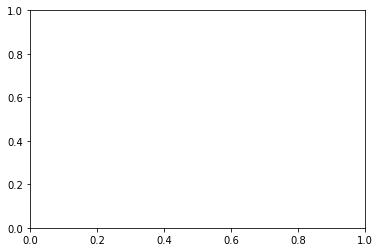

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
score = []
for i in range(390,300,-10):
    X_fschi = SelectKBest(chi2, k=i).fit_transform(X_fsvar, y)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()
    score.append(once)
plt.plot(range(350,200,-10),score)
plt.show()

通过这条曲线，我们可以观察到，随着K值的不断增加，模型的表现不断上升，这说明，K越大越好，数据中所有的
特征都是与标签相关的。但是运行这条曲线的时间同样也是非常地长，接下来我们就来介绍一种更好的选择k的方
法：**看p值选择k**。

卡方检验的本质是推测两组数据之间的差异，其检验的原假设是”两组数据是相互独立的”。卡方检验返回卡方值和
P值两个统计量，其中卡方值很难界定有效的范围，而p值，我们一般使用0.01或0.05作为显著性水平，即p值判断
的边界
P值     |<=0.05或0.01 | >0.05或0.01
--------|-------------|---------
数据差异|差异不是自然形成的 |这些差异是很自然的样本误差
相关性 |两组数据是相关的 |两组数据是相互独立的
原假设| 拒绝原假设，接受备择假设 |接受原假设

In [ ]:
chivalue, pvalues_chi = chi2(X_fsvar,y)
chivalue


NameError: name 'chi2' is not defined

In [ ]:
pvalues_chi
#k取多少？我们想要消除所有p值大于设定值，比如0.05或0.01的特征：
k = chivalue.shape[0] - (pvalues_chi > 0.05).sum()

##### 3.1.2.3 F检验
F检验，又称ANOVA，方差齐性检验，是用来捕捉每个特征与标签之间的线性关系的过滤方法。它即可以做回归也
可以做分类，因此包含feature_selection.f_classif（F检验分类）和feature_selection.f_regression（F检验回
归）两个类。其中F检验分类用于标签是离散型变量的数据，而F检验回归用于标签是连续型变量的数据。

和卡方检验一样，这两个类需要和类SelectKBest连用，并且我们也可以**直接通过输出的统计量来判断我们到底要
设置一个什么样的K**。需要注意的是，F检验在数据服从正态分布时效果会非常稳定，因此如果使用F检验过滤，我
们会先将数据转换成服从正态分布的方式。

**F检验的本质是寻找两组数据之间的线性关系，其原假设是”数据不存在显著的线性关系**“。它返回F值和p值两个统
计量。和卡方过滤一样，我们希望选取p值小于0.05或0.01的特征，这些特征与标签时显著线性相关的，而p值大于
0.05或0.01的特征则被我们认为是和标签没有显著线性关系的特征，应该被删除。以F检验的分类为例，我们继续
在数字数据集上来进行特征选择：

In [ ]:
from sklearn.feature_selection import f_classif
F, pvalues_f = f_classif(X_fsvar,y)
print(F,pvalues_f)


[ 618.65383492  846.18897012 1115.40617051 1362.3677305  1452.03355369
 1381.09095571 1138.26505266  464.29616121  660.00977785  849.66393412
 1004.7450309  1124.76177588 1200.99190762 1209.29489877 1110.4944286
  854.66183292  577.52063451  342.09729054  178.67397866  118.01145533
  612.12261014  899.40904291 1196.17528948 1424.49864852 1569.26556677
 1742.49910702 1910.98023795 1969.20520223 1731.37475948 1295.09668012
  839.15325001  531.97951763  371.82392681  336.00820537  378.93378743
  317.47025479  528.94881012  766.40792176  947.63168717 1086.0472161
 1177.72017709 1253.79641973 1344.06961068 1507.33781169 1616.50454434
 1512.25864876 1289.65180587 1051.26276412  839.48869386  680.07426932
  600.85538567  633.55772663  683.96908509  347.65867784  452.76238211
  509.16387684  515.7498157   532.86107778  594.62512658  664.18740444
  709.37133696  798.11767931  876.69849088  852.76926441  785.70173347
  802.88980095  813.2041131   760.85552527  687.94148028  642.84071735
  698.11

In [ ]:
k = F.shape[0] - (pvalues_f > 0.05).sum()
k   
# 大部分特征都对模型有关

392

##### 3.1.2.4 互信息法

互信息法是用来捕捉每个特征与标签之间的任意关系（**包括线性和非线性关系**）的过滤方法。和F检验相似，它既
可以做回归也可以做分类，并且包含两个类feature_selection.mutual_info_classif（互信息分类）和
feature_selection.mutual_info_regression（互信息回归）。这两个类的用法和参数都和F检验一模一样，不过
互信息法比F检验更加强大，F检验只能够找出线性关系，而互信息法可以找出任意关系。

互信息法不返回p值或F值类似的统计量，它返回“每个特征与目标之间的互信息量的估计”，这个估计量在[0,1]之间
取值，为0则表示两个变量独立，为1则表示两个变量完全相关。

### 3.2 Embedded嵌入法

嵌入法是一种让算法自己决定使用哪些特征的方法，即特征选择和算法训练同时进行。在使用嵌入法时，我们先使
用某些机器学习的算法和模型进行训练，得到各个特征的权值系数，根据权值系数从大到小选择特征。

这些权值系数往往代表了特征对于模型的某种贡献或某种重要性，比如决策树和树的集成模型中的feature_importances_属性，可以列出各个特征对树的建立的贡献，我们就可以基于这种贡献的评估，找出对模型建立最有用的特征。

因此相比于过滤法，**嵌入法的结果会更加精确到模型的效用本身**，对于提高模型效力有更好的效果。

嵌入法引入了算法来挑选特征，因此其计算速度也会和应用的算法有很大的关系。如果采用计算量很大，计算缓慢的算法，**嵌入法本身也会非常耗时耗力**。

- **feature_selection.SelectFromModel**

class **sklearn.feature_selection.SelectFromModel** (estimator, threshold=None, prefit=False, norm_order=1,max_features=None)



**参数**

- estimator 使用的模型评估器，只要是带feature_importances_或者coef_属性，或带有l1和l2惩罚
项的模型都可以使用
- threshold 特征重要性的阈值，重要性低于这个阈值的特征都将被删除
Tsa

In [48]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC

In [49]:
RFC_ = RFC(n_estimators=10,random_state=0) # 随机森林的实例化

In [50]:
X_embedded = SelectFromModel(RFC_,threshold=0.005).fit_transform(X,y)  # 嵌入法的实例化

# 0.005 对于785个特征来说，是非常高的阈值
X_embedded.shape()

NameError: name 'y' is not defined

如何确定最优的threshold？

绘制学习曲线 ---> 耗时较长 暂不运行

- linespace(start,end,num)

```
import numpy as np
import matplotlib.pyplot as plt

RFC_.fit(X,y).feature_importances_

threshold = np.linspace(0,(RFC_.fit(X,y).feature_importances_).max(),20)
#从0到最大的重要性之间按顺序选取20个数

score = []

for i in threshold:  # 阈值
    X_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(X,y)
    once = cross_val_score(RFC_,X_embedded,y,cv=5).mean()
    score.append(once)
plt.plot(threshold,score)
plt.show()
```

### 3.3 Wrapper包装法

包装法也是一个特征选择和算法训练同时进行的方法，与嵌入法十分相似，它也是依赖于算法自身的选择，比如coef_属性或feature_importances_属性来完成特征选择。但不同的是，我们往往使用一**个目标函数作为黑盒来帮助我们选取特征**，而不是自己输入某个评估指标或统计量的阈值。包装法在初始特征集上训练评估器，并且通过coef_属性或通过feature_importances_属性获得每个特征的重要性。然后，从当前的一组特征中修剪最不重要的特征。在修剪的集合上递归地重复该过程，直到最终到达所需数量的要选择的特征。区别于过滤法和嵌入法的一次训练解决所有问题，包装法要使用特征子集进行多次训练，因此**它所需要的计算成本是最高的.**

最典型的目标函数是**递归特征消除法**（Recursive feature elimination, 简写为RFE）。它是一种贪婪的优化算法，旨在找到性能最佳的特征子集。 它反复创建模型，并在每次迭代时**保留最佳特征或剔除最差特征**，下一次迭代时，它会使用上一次建模中没有被选中的特征来构建下一个模型，直到所有特征都耗尽为止。 然后，它根据自己保留或剔除特征的顺序来对特征进行排名，最终选出一个最佳子集。包装法的效果是所有特征选择方法中最利于提升模型表现的，它可以使用很少的特征达到很优秀的效果。除此之外，在特征数目相同时，包装法和嵌入法的效果能够匹敌，不过它比嵌入法算得更见缓慢，所以也不适用于太大型的数据。相比之下，包装法是最能保证模型效果的特征选择方法。

- **feature_selection.RFE**
  
class sklearn.feature_selection.RFE (estimator, n_features_to_select=None, step=1, verbose=0)

参数estimator是需要填写的实例化后的评估器，n_features_to_select是想要选择的特征个数，step表示每次迭代中希望移除的特征个数。除此之外，RFE类有两个很重要的属性，.support_：返回所有的特征的是否最后被选中的布尔矩阵，以及.ranking_返回特征的按数次迭代中综合重要性的排名。类feature_selection.RFECV会在交叉验证循环中执行RFE以找到最佳数量的特征，增加参数cv，其他用法都和RFE一模一样

In [47]:
from sklearn.feature_selection import RFE

RFC_ = RFC(n_estimators =10,random_state=0)

selector = RFE(RFC_, n_features_to_select=340, step=50).fit(X, y)
selector.support_.sum()
selector.ranking_
X_wrapper = selector.transform(X)
cross_val_score(RFC_,X_wrapper,y,cv=5).mean()

NameError: name 'RFC' is not defined